<a href="https://colab.research.google.com/github/amaziarczyk/Projects/blob/master/Pozosta%C5%82e_projekty/Grupowanie_hierarchiczne_i_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import sklearn
import plotly.express as px
import matplotlib.pyplot as plt


In [3]:
from sklearn.datasets import make_blobs

In [4]:
data = make_blobs(n_samples=10, centers=2, cluster_std=1.0, center_box=(-8.0, 8.0), random_state=42)[0]
df = pd.DataFrame(data, columns=['x1', 'x2'])
df.head()

,x1,x2
0,1.986985,1.016248
1,-2.470776,6.745699
2,-0.428145,7.978864
3,2.699072,1.892783
4,-2.241511,6.977292


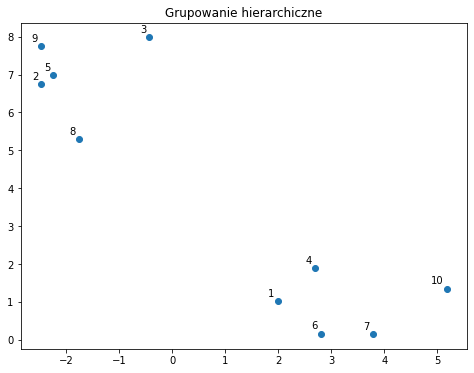

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(data[:,0], data[:,1])

for label, x, y in zip(range(1, 11), data[:, 0], data[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-3, 3), textcoords='offset points', ha='right', va='bottom')
plt.title('Grupowanie hierarchiczne')
plt.show()

In [11]:
from sklearn.cluster import AgglomerativeClustering

In [17]:
cluster=AgglomerativeClustering()
y_pred =cluster.fit_predict(data)


In [30]:
df['pred']=y_pred
df.head()

,x1,x2,pred
0,1.986985,1.016248,0
1,-2.470776,6.745699,1
2,-0.428145,7.978864,1
3,2.699072,1.892783,0
4,-2.241511,6.977292,1


In [44]:
px.scatter(df,
           x='x1',
           y='x2',
           color='pred',
           title='Podział na klastry',
           width=800,
           height = 350)


In [91]:
# Porównanie rożnych metryk
dane = make_blobs(n_samples=1000, centers=4, cluster_std=1.5, center_box=(-8.0, 8.0), random_state=42)[0]
df = pd.DataFrame(dane, columns=['x1', 'x2'])
df.head()

,x1,x2
0,-6.645730,5.470461
1,-4.390559,-5.055149
2,-4.666211,-5.390080
3,3.022862,0.303769
4,3.322516,-0.676179


In [80]:
# Metryka euklidesowa
euklidesowa = AgglomerativeClustering(n_clusters=4,affinity='euclidean')
y_pred_eu=euklidesowa.fit_predict(dane)

In [81]:
df['y_pred_eu']=y_pred_eu
df2=df.copy()


In [82]:
#Metryka Manhattan
manhattan=AgglomerativeClustering(n_clusters=4, affinity="manhattan", linkage='complete')
y_pred_m=manhattan.fit_predict(dane)

In [83]:
#Metryka cosinusowa
cosinus=AgglomerativeClustering(n_clusters=4, affinity="cosine", linkage='complete')
y_pred_c=cosinus.fit_predict(dane)

In [84]:
df2['y_pred_m']=y_pred_m
df2['y_pred_c']=y_pred_c
df2.head()

,x1,x2,y_pred_eu,y_pred_m,y_pred_c
0,-6.645730,5.470461,3,0,2
1,-4.390559,-5.055149,1,3,1
2,-4.666211,-5.390080,1,3,1
3,3.022862,0.303769,2,2,0
4,3.322516,-0.676179,2,2,0


In [102]:
px.scatter(df2, 'x1', 'x2',color='y_pred_eu', title="Metryka euklidesowa", width=600, height=300)

In [103]:
px.scatter(df2, 'x1', 'x2',color='y_pred_m', title="Metryka manhattan", width=600, height=300)

In [105]:
px.scatter(df2, 'x1', 'x2',color='y_pred_c', title="Metryka cosinusowa", width=600, height=300)

# DBSCAN

In [117]:
dane = make_blobs(n_samples= 1000, centers= 3)[0]
df=pd.DataFrame(dane, columns=['x','y'])
df.head()

,x,y
0,-4.065475,9.380228
1,-3.959943,-8.184696
2,-3.803478,-7.211886
3,4.375516,-6.422853
4,-4.351171,-7.517501


In [118]:
from sklearn.cluster import DBSCAN 

In [125]:
cluster=DBSCAN()
cluster.fit(dane)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [126]:
y_pred=cluster.labels_

In [127]:
df['dbscan']=y_pred
df.head()

,x,y,dbscan
0,-4.065475,9.380228,0
1,-3.959943,-8.184696,1
2,-3.803478,-7.211886,1
3,4.375516,-6.422853,2
4,-4.351171,-7.517501,1


In [130]:
px.scatter(df,'x','y', color='dbscan', title= 'Klasteryzacja DBSCAN', width=800, height=400)